In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
aso_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20180331_latlon.nc")
aso_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/swe_regrid_250m_ASO_250M_SWE_bilin_20190407_latlon.nc")

# open up hte snow depth data 
aso_sd_dat1 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20180330_latlon.nc")
aso_sd_dat2 = pl.Path("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/sd_regrid_250m_ASO_SD_250m_bilin_20190407_latlon.nc")

mp55_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs2/model_out_wy2019_Ishmael.nc")
mp55_lsmout_2019 = xr.open_dataset(mp55_run19)


In [7]:
mp55_lsmout_2019

<xarray.Dataset>
Dimensions:   (south_north: 239, time: 214, west_east: 179)
Coordinates:
  * time      (time) datetime64[ns] 2018-10-01 2018-10-02 ... 2019-05-02
    lat       (south_north, west_east) float32 ...
    lon       (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Data variables:
    SNEQV     (time, south_north, west_east) float64 ...
    SWFORC    (time, south_north, west_east) float64 ...
    LWFORC    (time, south_north, west_east) float64 ...
    RAINRATE  (time, south_north, west_east) float64 ...
    ACCPRCP   (time, south_north, west_east) float64 ...
    ACCECAN   (time, south_north, west_east) float64 ...
    ACCEDIR   (time, south_north, west_east) float64 ...
    LH        (time, south_north, west_east) float64 ...
    ACSNOW    (time, south_north, west_east) float64 ...
    ACSNOM    (time, south_north, west_east) float64 ...
    SNOWH     (time, south_north, west_east) float64 ...
Attributes:
    TITLE:                      OUTPUT FROM WRF-Hydro v5.1.0-beta2
    model_initialization_time:  2018-10-01_00:00:00
    model_output_valid_time:    2018-10-01_00:00:00
    model_total_valid_times:    213
    Conventions:                CF-1.6
    code_version:               v5.1.0-beta2
    model_output_type:          land
    model_configuration:        default
    proj4:                      
    GDAL_DataType:              Generic
    history:                    Fri Apr 29 14:43:35 2022: ncrcat 201810010000...
    NCO:                        "4.6.1"
    nco_openmp_thread_number:   1

In [3]:
# open up all of the swe data ... 
swe1=xr.open_dataset(aso_dat1)
swe2=xr.open_dataset(aso_dat2)

sd1=xr.open_dataset(aso_sd_dat1).Band1
sd2=xr.open_dataset(aso_sd_dat2).Band1

# get just the swe in mm 
swevar1 = swe1.where(swe1>0).Band1*1000
swevar2 = swe2.where(swe2>0).Band1*1000

# get the density ...
dens1 = swevar1/sd1
dens2 = swevar2/sd2



# use the thompson density 



In [4]:
swenmp = mp55_lsmout_2019.SNEQV.sel(time="2019-04-07")
snhnmp = mp55_lsmout_2019.SNOWH.sel(time="2019-04-07")
dennmp = swenmp/snhnmp


/home/wrudisill/miniconda3/envs/wrfplotenv/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


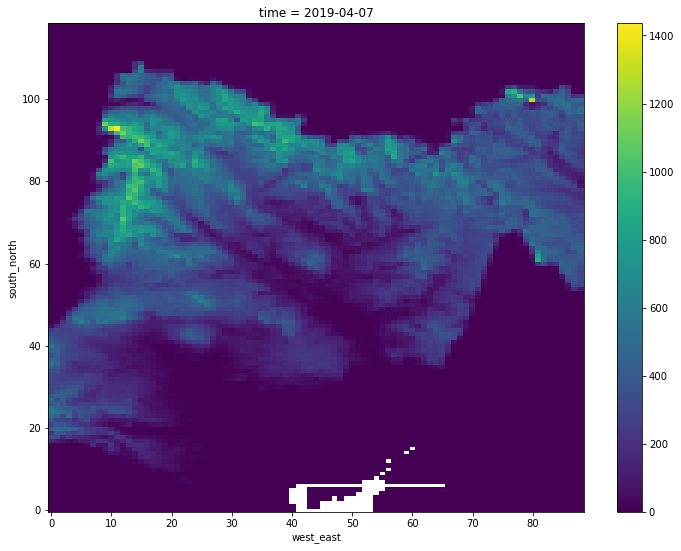

In [5]:
fig,ax = plt.subplots()
fig.set_size_inches(12,9)
aso1km19 = (sd1 * dennmp).coarsen(south_north=2, west_east=2, boundary='trim').mean()
aso1km19.plot(ax=ax)
# coarsen_sd = sd1.coarsen(south_north=2, west_east=2, boundary='trim').std()
# coarsen_sd.plot(cmap='Spectral_r', vmax=.6)

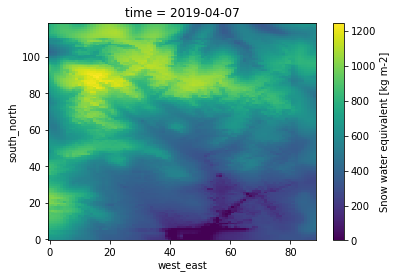

In [6]:
swenmp.coarsen(south_north=2, west_east=2, boundary='trim').mean().plot()